In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta as td
import os #Для получения списка файлов и определения самого последнего из них по названию

today = dt.now();
current_date = str(dt.now())[:10];


In [3]:
#Соханим словарь названий ГЭС, чтобы в дальнейшем было нагляднее где какая ГЭС
GES_name = {'IRK': 'Иркутская ГЭС', 'SHA': 'Саяно-Шушенская ГЭС', 'KRA': 'Красноярская ГЭС',
            'BRA': 'Братская ГЭС', 'UIM': 'Усть-Илимская ГЭС', 'BOG': 'Богучанская ГЭС',
            'MAI': 'Майнская ГЭС', 'MAM': 'Мамаканская ГЭС', 'NSK': 'Новосибирская ГЭС'};

mes = {'январь': 1, 'февраль': 2, 'март': 3, 'апрель': 4,
       'май': 5, 'июнь': 6, 'июль': 7, 'август':8,
       'сентябрь': 9, 'октябрь': 10, 'ноябрь': 11, 'декабрь':12};

#Загрузим данные выработки ГЭС
ges_vir = pd.read_excel(f'../data/Исходные данные/Показатели ГЭС/ГЭСы с 1981.xlsx', header=0); #Выработка ГЭС с 1981
ges_vir['Год'] = ges_vir['Год'].fillna(method='ffill', axis=0);
ges_vir = ges_vir.dropna(subset=['Месяц']);
ges_vir['Месяц'] = ges_vir['Месяц'].map(mes);
ges_vir.index = pd.to_datetime(ges_vir['Год'].astype(int).astype(str) + '-' +
                               ges_vir['Месяц'].astype(str) + '-01');
ges_vir.rename(columns={GES_name[i]: i for i in GES_name}, inplace=True);
ges_vir.index.name = 'Дата';
ges_vir.drop(columns=['Год', 'Месяц'], inplace=True);
ges_vir.head()

,BRA,IRK,KRA,MAI,MAM,NSK,SHA,UIM
Дата,,,,,,,,
1981-01-01,1852.0,274.0,0.0,NaN,NaN,64.0,549.317,1861.0
1981-02-01,1458.0,254.0,0.0,NaN,NaN,56.0,397.648,1593.0
1981-03-01,1304.0,271.0,0.0,NaN,NaN,66.0,279.305,1494.0
1981-04-01,1553.0,238.0,0.0,NaN,NaN,134.0,232.001,1164.0
1981-05-01,1383.0,257.0,0.0,NaN,NaN,242.0,176.428,1734.0


In [9]:
#Данные из созвездия
ges_soz = pd.read_excel(f'../data/Исходные данные/Показатели ГЭС/Обновить ГЭСы уровень сброс выработка.xlsx', skiprows=4, header=0, sheet_name='Выработка'); #Выработка ГЭС из созвездия
ges_soz['Год'] = ges_soz['Год'].fillna(method='ffill', axis=0);
ges_soz.index = pd.to_datetime(ges_soz['Год'].astype(int).astype(str) + '-' +
                               ges_soz['N месяца'].astype(str) + '-01');
ges_soz.drop(columns=['Год', 'N месяца'], inplace=True);
ges_soz.rename(columns={GES_name[i]: i for i in GES_name}, inplace=True);
ges_soz.index.name = 'Дата';
ges_soz = ges_soz/10**3
ges_soz

,BOG,BRA,IRK,KRA,MAI,MAM,NSK,SHA,UIM
Дата,,,,,,,,,
2007-01-01,NaN,2196.020000,306.7680,1392.65,154.100,12.2880,89.520,1826.800,1895.90
2007-02-01,NaN,2113.641000,296.8140,1313.09,117.313,8.2800,91.680,1534.100,1713.80
2007-03-01,NaN,2247.911000,331.8810,1688.29,133.300,8.9880,105.810,1921.100,1891.60
2007-04-01,NaN,1888.545000,330.2500,2162.85,97.440,11.3040,183.295,1980.400,1835.20
2007-05-01,NaN,1926.724000,321.9950,2253.08,120.000,41.1440,288.262,2069.500,1868.02
...,...,...,...,...,...,...,...,...,...
2021-12-01,1719.817,2298.755494,415.1534,2038.28,104.592,16.3920,81.744,1639.780,2018.14
2022-01-01,1663.624,2680.740000,378.5910,1359.60,118.542,12.3000,85.008,1646.460,2203.40
2022-02-01,1694.098,2034.708997,269.0640,1151.40,106.353,7.8852,75.600,1403.070,1986.20


In [10]:
#Объеденим фреймы
df_prod = pd.concat([ges_vir,
                     ges_soz],
                    axis=0);
df_prod = df_prod.groupby(df_prod.index).agg('first');
df_prod.head()

,BRA,IRK,KRA,MAI,MAM,NSK,SHA,UIM,BOG
Дата,,,,,,,,,
1981-01-01,1852.0,274.0,0.0,NaN,NaN,64.0,549.317,1861.0,NaN
1981-02-01,1458.0,254.0,0.0,NaN,NaN,56.0,397.648,1593.0,NaN
1981-03-01,1304.0,271.0,0.0,NaN,NaN,66.0,279.305,1494.0,NaN
1981-04-01,1553.0,238.0,0.0,NaN,NaN,134.0,232.001,1164.0,NaN
1981-05-01,1383.0,257.0,0.0,NaN,NaN,242.0,176.428,1734.0,NaN


In [16]:
#Загрузим данные по притокам, сбросам, уровням
date_data_model = max([i[:10] for i in os.listdir('../data/Исходные данные/Показатели ГЭС/Свод после обработки/') if 'Графики' not in i]);
stat = pd.read_excel(f'../data/Исходные данные/Показатели ГЭС/Свод после обработки/{date_data_model} Целевые переменные.xlsx', index_col=0, header=0);
stat.head()

,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,
1967-01-01,260.0,400.0,1685.0,2220.0,2283.0,NaN,2020.0,1200.0,2510.0,2220.0,2380.0,1531.0,456.39,521.53,238.96,397.95,294.08,192.78
1967-02-01,370.0,295.0,1775.0,1870.0,2468.0,NaN,1690.0,1200.0,2510.0,2407.0,2380.0,1531.0,456.28,521.53,238.96,397.69,294.08,192.78
1967-03-01,330.0,290.0,1685.0,2479.0,2184.0,NaN,2279.0,1200.0,2510.0,2125.0,2380.0,1531.0,456.11,521.53,238.96,397.88,294.08,192.78
1967-04-01,1080.0,495.0,2870.0,3130.0,2543.0,NaN,2150.0,1200.0,2510.0,2089.0,2380.0,1531.0,456.04,521.53,238.96,398.42,294.08,192.78
1967-05-01,3870.0,3270.0,5240.0,3680.0,3929.0,NaN,1980.0,1200.0,2510.0,2691.0,2380.0,1531.0,456.17,521.53,238.96,398.95,294.08,192.78


In [15]:
#Загрузим прогноз по притокам, сбросам, уровням
date_data_prog = max([i[:10] for i in os.listdir('../data/Результаты моделирования/Выработка/') if 'Прогноз метрик ГЭС' in i]);
prog = pd.read_excel(f'../data/Результаты моделирования/Выработка/{date_data_prog} Прогноз метрик ГЭС.xlsx', index_col=0, header=0);
prog.head()

,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,
2011-10-01,1500.0,1142.0,2751.0,2825.0,2807.0,1531.0,600.0,1040.0,2240.0,2250.0,2974.0,2967.0,456.70,535.89,236.99,398.26,295.74,192.78
2011-11-01,1500.0,1100.0,2639.0,2806.0,2844.0,1531.0,-300.0,495.0,1970.0,1870.0,2922.0,2968.0,456.55,532.81,235.15,397.73,295.75,192.78
2011-12-01,1500.0,1064.0,2616.0,2695.0,2799.0,1531.0,-300.0,405.0,1785.0,1760.0,2816.0,2814.0,456.39,529.17,233.15,397.28,295.68,192.78
2012-01-01,1500.0,1175.0,2456.0,2776.0,2748.0,1531.0,100.0,390.0,1740.0,1710.0,2933.0,2908.0,456.29,524.44,231.49,396.75,295.84,192.78
2012-02-01,1500.0,1402.0,2416.0,2493.0,2801.0,1531.0,290.0,340.0,1705.0,1670.0,2646.0,2851.0,456.20,516.59,230.26,396.35,295.50,192.78


In [17]:
#Объеденим фреймы
df_metr = pd.concat([stat,
                     prog],
                    axis=0);
df_metr = df_metr.groupby(df_metr.index).agg('first');
df_metr.head()

,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,
1967-01-01,260.0,400.0,1685.0,2220.0,2283.0,NaN,2020.0,1200.0,2510.0,2220.0,2380.0,1531.0,456.39,521.53,238.96,397.95,294.08,192.78
1967-02-01,370.0,295.0,1775.0,1870.0,2468.0,NaN,1690.0,1200.0,2510.0,2407.0,2380.0,1531.0,456.28,521.53,238.96,397.69,294.08,192.78
1967-03-01,330.0,290.0,1685.0,2479.0,2184.0,NaN,2279.0,1200.0,2510.0,2125.0,2380.0,1531.0,456.11,521.53,238.96,397.88,294.08,192.78
1967-04-01,1080.0,495.0,2870.0,3130.0,2543.0,NaN,2150.0,1200.0,2510.0,2089.0,2380.0,1531.0,456.04,521.53,238.96,398.42,294.08,192.78
1967-05-01,3870.0,3270.0,5240.0,3680.0,3929.0,NaN,1980.0,1200.0,2510.0,2691.0,2380.0,1531.0,456.17,521.53,238.96,398.95,294.08,192.78


In [18]:
#Добавим дополнительные фичи и целевую переменную
df_all = pd.concat([df_metr,
                    df_prod
                   ], axis=1);

df_all.insert(0, 'month', df_all.index.month.astype(float)); #Тип данных нужно указать для нормализации
df_all.insert(1, 'weekofyear', pd.Int64Index(df_all.index.isocalendar().week).astype(float)); #Тип данных нужно указать для нормализации
df_all.replace(0, np.NaN, inplace=True); #Из-за того, что по Красноярску проставлены нули, хотя там нет данных

id_prog = max(df_all.loc[(df_all.notnull().sum(1) >= 26)].index) #Дата начала прогнозного периода

df_fact = df_all.loc[df_all.index<=id_prog]; #Только факт
df_fact = df_fact.loc[df_fact.notnull().sum(1) >= 26] #Обросим совсем старые данные с большим количеством пропусков

df_forecast = df_all.loc[df_all.index>id_prog]; #Только прогноз

display(df_fact, df_forecast) #Данные должны начинаться с 1984 года

,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,...,Уровень_BOG,BRA,IRK,KRA,MAI,MAM,NSK,SHA,UIM,BOG
Дата,,,,,,,,,,,,,,,,,,,,,
1984-01-01,1.0,52.0,50.000000,360.000000,1770.000000,2012.000000,3116.000000,3120.000000,1792.000000,1200.000000,...,192.78,1965.000000,340.0000,1711.70,NaN,NaN,72.000,687.506,1826.00,NaN
1984-02-01,2.0,5.0,430.000000,325.000000,1715.000000,1933.000000,3310.000000,3698.000000,1773.000000,1200.000000,...,192.78,1960.000000,304.0000,1568.50,NaN,NaN,67.000,521.943,2017.00,NaN
1984-03-01,3.0,9.0,220.000000,280.000000,1710.000000,1984.000000,3131.000000,3436.000000,1829.000000,1200.000000,...,192.78,1997.000000,343.0000,1282.10,NaN,NaN,76.000,388.939,1995.00,NaN
1984-04-01,4.0,13.0,640.000000,420.000000,2070.000000,2344.000000,3148.000000,3339.000000,1917.000000,1200.000000,...,192.78,1906.000000,343.0000,1151.80,NaN,NaN,107.000,359.523,1857.00,NaN
1984-05-01,5.0,18.0,4180.000000,2430.000000,5300.000000,3951.000000,4127.000000,3620.000000,1501.000000,1200.000000,...,192.78,1599.000000,286.0000,1304.20,NaN,NaN,301.000,882.055,1493.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-01,12.0,48.0,-158.333333,515.161290,1547.391304,2619.666667,5479.133333,3431.129032,2281.333333,1210.290323,...,207.48,2298.755494,415.1534,2038.28,104.592,16.3920,81.744,1639.780,2018.14,1719.817
2022-01-01,1.0,52.0,539.285714,457.741935,1499.032258,2271.935484,3928.064516,3641.096774,2032.903226,1209.677419,...,207.62,2680.740000,378.5910,1359.60,118.542,12.3000,85.008,1646.460,2203.40,1663.624
2022-02-01,2.0,5.0,530.357143,418.928571,1385.714286,1726.964286,3327.500000,3830.142857,1539.285714,1153.571429,...,207.54,2034.708997,269.0640,1151.40,106.353,7.8852,75.600,1403.070,1986.20,1694.098


,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,...,Уровень_BOG,BRA,IRK,KRA,MAI,MAM,NSK,SHA,UIM,BOG
Дата,,,,,,,,,,,,,,,,,,,,,
2022-05-01,5.0,17.0,2425.404780,2286.904135,5400.241961,3509.209610,3421.025991,3746.602523,2280.986367,1656.899469,...,205.653494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,6.0,22.0,2186.653044,2028.679983,5037.424738,3153.844169,3091.340870,3414.178056,1917.479982,1343.027712,...,205.622267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-07-01,7.0,26.0,3244.618507,3438.799073,5805.354648,3711.595028,2716.606998,3565.090882,1808.065784,1368.932046,...,205.674235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-01,8.0,31.0,3838.476328,3430.463605,5490.583454,3853.770136,2571.007225,3387.986958,1674.701021,1449.140490,...,205.672847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-01,9.0,35.0,3421.903272,3279.760484,5030.903580,3688.699428,2489.432967,3070.072723,1610.917912,1506.068999,...,205.651241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,10.0,39.0,2633.436676,2356.527562,4193.729325,3438.806532,2486.309907,2897.503654,1508.534730,1413.713536,...,205.608232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,11.0,44.0,1265.133752,1164.724505,3168.400072,2348.549148,2356.544491,2716.644849,1441.609097,1111.520718,...,205.610892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,12.0,48.0,260.088025,642.598494,2731.689601,1836.167671,2245.967800,2514.194919,1412.916483,1022.927225,...,205.628350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-01,1.0,52.0,-195.260828,353.601131,1963.441810,1529.173736,2082.154047,2315.608042,1344.473564,902.424043,...,205.629342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Этап 1
Обучение модели по факт данным

In [21]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_log_error as msle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.externals import joblib

import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [22]:
def score_my(t, f):
    """
    Метрики для оценки модели.
    """
    return ("""RMSE: %.2f%%, %.4f; MAE: %.2f%%, %.4f"""
            % (mse(t, f)**0.5/t.mean()*100, mse(t, f)**0.5,
               mae(t, f)/t.mean()*100, mae(t, f)));

In [23]:
X_train_fact, X_test_fact, y_train_fact, y_test_fact = train_test_split(df_fact.drop(columns=GES_name.keys()),
                                                                        df_fact.loc[:, GES_name.keys()],
                                                                        test_size=0.2,
                                                                        random_state=42);

display(X_train_fact, X_test_fact, y_train_fact, y_test_fact);

,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,,,
1985-06-01,6.0,22.0,7790.0,4670.0,6300.0,4388.0,3183.0,3153.0,2018.0,1200.0,2710.0,2585.0,2790.0,1531.0,456.78,521.53,239.99,399.99,296.27,192.78
1989-07-01,7.0,26.0,4240.0,2730.0,3110.0,4150.0,3624.0,3670.0,1750.0,1250.0,2580.0,3423.0,3520.0,1531.0,456.57,521.81,235.69,400.83,295.88,192.78
1995-01-01,1.0,52.0,200.0,495.0,1785.0,2529.0,3529.0,3587.0,2309.0,1269.0,2570.0,3412.0,3576.0,1531.0,456.68,523.22,235.66,400.56,295.51,192.78
2003-06-01,6.0,22.0,3300.0,3260.0,5350.0,2960.0,2925.0,3137.0,1500.0,1308.0,2756.0,2866.0,2882.0,1531.0,456.19,534.29,235.06,394.89,295.36,192.78
1986-08-01,8.0,31.0,3240.0,2670.0,3250.0,3533.0,3432.0,3207.0,1703.0,1200.0,2800.0,3286.0,3150.0,1531.0,457.03,521.53,242.85,401.68,296.38,192.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-12-01,12.0,48.0,-220.0,300.0,1800.0,1820.0,3997.0,3717.0,1550.0,842.0,1760.0,3927.0,3680.0,1531.0,456.43,521.53,227.99,398.29,295.80,192.78
1992-11-01,11.0,44.0,-100.0,635.0,2205.0,2884.0,2838.0,2823.0,2484.0,1660.0,3255.0,2765.0,2790.0,1531.0,456.82,534.99,240.47,400.42,295.66,192.78
2009-06-01,6.0,23.0,4600.0,4170.0,5870.0,4098.0,3042.0,3310.0,1698.0,2026.0,3024.0,2525.0,2906.0,1531.0,456.45,527.88,239.66,398.29,295.83,192.78


,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,,,
2021-09-01,9.0,35.0,4555.000000,2123.333333,3286.666667,5556.000000,5931.333333,6216.666667,3578.333333,2378.666667,3821.000000,5931.333333,5963.333333,6401.000000,457.23,536.57,241.76,401.42,295.62,207.92
1990-04-01,4.0,13.0,820.000000,460.000000,2130.000000,2051.000000,2732.000000,2950.000000,1551.000000,839.000000,1904.000000,2662.000000,2910.000000,1531.000000,456.04,499.93,223.46,395.27,294.75,192.78
1998-09-01,9.0,36.0,3800.000000,1610.000000,2640.000000,4136.000000,3251.000000,3124.000000,3036.000000,1142.000000,2435.000000,3192.000000,3011.000000,1531.000000,456.98,534.96,230.43,396.95,295.15,192.78
1986-07-01,7.0,27.0,5100.000000,3290.000000,3280.000000,4251.000000,3433.000000,3221.000000,1781.000000,1200.000000,2510.000000,3286.000000,3160.000000,1531.000000,456.92,521.53,240.93,401.43,296.28,192.78
2016-09-01,9.0,35.0,2580.000000,1935.000000,3058.636364,2650.200000,2786.700000,2965.833333,1318.166667,2048.966667,3152.727273,2786.700000,2842.636364,2987.500000,456.50,537.96,241.00,397.65,295.60,207.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-11-01,11.0,44.0,110.000000,675.000000,2385.000000,3135.000000,2997.000000,2801.000000,2685.000000,1750.000000,2633.000000,2917.000000,2750.000000,1531.000000,456.77,535.97,238.24,400.49,295.75,192.78
2018-02-01,2.0,5.0,296.428571,323.571429,1534.210526,1427.142857,1958.714286,2025.285714,1250.000000,1275.321429,2613.157895,1958.714286,2011.107143,2016.357143,455.82,516.62,234.00,394.84,294.69,207.21
1988-10-01,10.0,39.0,1530.000000,890.000000,2190.000000,3660.000000,3626.000000,3661.000000,2710.000000,1110.000000,2630.000000,3547.000000,3500.000000,1531.000000,457.27,530.79,241.01,401.64,296.23,192.78


,IRK,SHA,KRA,BRA,UIM,BOG,MAI,MAM,NSK
Дата,,,,,,,,,
1985-06-01,363.000,1654.056000,1554.000000,1601.000000,1610.00,NaN,NaN,NaN,323.000
1989-07-01,329.000,1497.929000,1508.100000,2276.000000,2072.00,NaN,NaN,NaN,296.000
1995-01-01,421.000,1684.084000,1493.800000,2208.000000,2063.00,NaN,NaN,NaN,99.000
2003-06-01,268.000,1648.410000,1524.900000,1682.000000,1620.00,NaN,NaN,NaN,252.000
1986-08-01,326.000,2372.368000,1727.100000,2041.000000,1691.00,NaN,NaN,NaN,195.000
...,...,...,...,...,...,...,...,...,...
1989-12-01,295.000,1020.052000,877.771829,2576.000000,2161.00,NaN,NaN,NaN,92.000
1992-11-01,437.000,2220.070000,1935.500000,1710.000000,1596.00,NaN,NaN,NaN,114.000
2009-06-01,306.360,2617.667706,1754.900000,1626.806064,1641.90,NaN,151.200,59.713,307.495


,IRK,SHA,KRA,BRA,UIM,BOG,MAI,MAM,NSK
Дата,,,,,,,,,
2021-09-01,432.132,3139.100,2316.030,3032.755000,1127.000000,1120.534,89.246,61.728000,124.224
1990-04-01,279.000,921.280,912.200,1578.000000,1641.000000,NaN,NaN,NaN,141.000
1998-09-01,476.000,1499.535,1291.800,1936.000000,1676.000000,NaN,NaN,NaN,124.000
1986-07-01,340.000,2346.856,1538.400,2033.000000,1866.000000,NaN,NaN,NaN,247.000
2016-09-01,242.216,2857.580,1883.835,1870.964287,1634.693308,1367.648,125.642,40.977067,170.289
...,...,...,...,...,...,...,...,...,...
1991-11-01,469.000,2205.347,1290.400,1806.000000,1577.000000,NaN,NaN,NaN,105.000
2018-02-01,209.880,1534.995,1374.120,1120.300000,1040.200000,863.280,100.216,6.744000,88.435
1988-10-01,493.000,1437.600,1621.800,2312.000000,2071.000000,NaN,NaN,NaN,158.000


In [24]:
#Проведем нормализацию данных
#Она нужна, чтобы снизить влияние фичей с большими показателями
scaler_fact = StandardScaler();
scaler_fact.fit(X_train_fact);
X_train_fact = pd.DataFrame(data=scaler_fact.transform(X_train_fact),
                            index=X_train_fact.index,
                            columns=X_train_fact.columns);

#Сохраним модель стандартизации данных
joblib.dump(scaler_fact,
            f'../data/Параметры модели/StandardScaler fit/{current_date} Генерация Стандартизация данных.joblib');

X_test_fact = pd.DataFrame(data=scaler_fact.transform(X_test_fact),
                           index=X_test_fact.index,
                           columns=X_test_fact.columns);

display(X_train_fact, X_test_fact);

,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,,,
1985-06-01,-0.105504,-0.231539,3.370770,2.551123,2.390486,1.579647,0.179077,-0.072048,0.421247,-0.567486,-0.158109,-0.643671,-0.480046,-0.471421,0.987691,-0.149283,1.156738,1.040700,1.827846,-0.545853
1989-07-01,0.183782,0.031530,1.409608,0.998795,0.140285,1.339624,0.991134,0.974584,-0.166704,-0.454668,-0.405133,0.954140,1.024608,-0.471421,0.329906,-0.125776,0.092512,1.485625,0.966904,-0.545853
1995-01-01,-1.551936,1.741476,-0.822251,-0.789584,-0.794360,-0.295160,0.816201,0.806556,1.059657,-0.411798,-0.424135,0.933166,1.140033,-0.471421,0.674460,-0.007405,0.085087,1.342614,0.150113,-0.545853
2003-06-01,-0.105504,-0.231539,0.890314,1.422884,1.720363,0.139505,-0.296004,-0.104439,-0.715166,-0.323800,-0.070700,-0.107890,-0.290418,-0.471421,-0.860372,0.921936,-0.063410,-1.660636,-0.181019,-0.545853
1986-08-01,0.473068,0.360365,0.857167,0.950784,0.239040,0.717377,0.637586,0.037272,-0.269815,-0.567486,0.012908,0.692923,0.261975,-0.471421,1.770769,-0.149283,1.864573,1.935848,2.070676,-0.545853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989-12-01,1.630214,1.478408,-1.054276,-0.945617,-0.783779,-1.010188,1.677976,1.069732,-0.605473,-1.375260,-1.963287,1.915115,1.354395,-0.471421,-0.108617,-0.149283,-1.813196,0.140254,0.790301,-0.545853
1992-11-01,1.340927,1.215339,-0.987983,-0.677560,-0.498095,0.062859,-0.456206,-0.740111,1.443580,0.470436,0.877494,-0.300466,-0.480046,-0.471421,1.112984,0.980702,1.275536,1.268459,0.481245,-0.545853
2009-06-01,-0.105504,-0.165772,1.608486,2.151038,2.087167,1.287182,-0.080560,0.245788,-0.280784,1.296260,0.438550,-0.758073,-0.240950,-0.471421,-0.045971,0.383808,1.075065,0.140254,0.856527,-0.545853


,month,weekofyear,Приток_IRK,Приток_SHA,Приток_KRA,Приток_BRA,Приток_UIM,Приток_BOG,Сброс_IRK,Сброс_SHA,Сброс_KRA,Сброс_BRA,Сброс_UIM,Сброс_BOG,Уровень_IRK,Уровень_SHA,Уровень_KRA,Уровень_BRA,Уровень_UIM,Уровень_BOG
Дата,,,,,,,,,,,,,,,,,,,,
2021-09-01,0.762355,0.623434,1.583626,0.513359,0.264904,2.757579,5.239857,6.130141,3.844381,2.092000,1.953000,5.736770,6.060732,7.514899,2.397231,1.113345,1.594804,1.798133,0.392943,1.976936
1990-04-01,-0.684077,-0.823444,-0.479738,-0.817590,-0.550999,-0.777224,-0.651394,-0.483008,-0.603279,-1.382029,-1.689660,-0.496856,-0.232706,-0.471421,-1.330219,-1.962632,-2.934346,-1.459360,-1.527620,-0.545853
1998-09-01,0.762355,0.689201,1.166534,0.102605,-0.191250,1.325505,0.304292,-0.130756,2.654584,-0.698354,-0.680660,0.513693,-0.024528,-0.471421,1.614154,0.978184,-1.209309,-0.569508,-0.644603,-0.545853
1986-07-01,0.183782,0.097297,1.884706,1.446889,0.260201,1.441482,0.639427,0.065614,-0.098694,-0.567486,-0.538146,0.692923,0.282587,-0.471421,1.426215,-0.149283,1.389383,1.803430,1.849922,-0.545853
2016-09-01,0.762355,0.623434,0.492557,0.362660,0.104053,-0.172929,-0.550669,-0.450954,-1.114080,1.348081,0.683156,-0.259091,-0.371554,1.917095,0.110644,1.230038,1.406708,-0.198737,0.348792,1.905284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991-11-01,1.340927,1.215339,-0.871971,-0.645553,-0.371125,0.315993,-0.163423,-0.784648,1.884544,0.673507,-0.304423,-0.010648,-0.562493,-0.471421,0.956368,1.062974,0.723623,1.305536,0.679923,-0.545853
2018-02-01,-1.262650,-1.349581,-0.768980,-0.926756,-0.971265,-1.406386,-2.075322,-2.355030,-1.263628,-0.397534,-0.342127,-1.837808,-2.085476,0.324517,-2.019327,-0.561484,-0.325754,-1.687120,-1.660073,1.858628
1988-10-01,1.051641,0.886503,-0.087505,-0.473517,-0.508676,0.845457,0.994817,0.956364,1.939390,-0.770558,-0.310124,1.190570,0.983384,-0.471421,2.522524,0.628107,1.409183,1.914661,1.739545,-0.545853


In [25]:
#На всякий слуйчай ставлю заглушку, чтобы гридсерч не запустился случайно
if '' == '7fhyuo89yfjh':
    model_cat_gs_fact = CatBoostRegressor(task_type="CPU");

    fact_score_gs = {}; #Для записи метрик
    fact_best_params_gs = {}; #Для лучших параметров сетки
    y_predicted_fact_gs = {}; #Прогноз притока по каждой ГЭС
    cv = RepeatedKFold(n_splits=2, n_repeats=1, random_state=42); #Кросс-валидация
    #Параметры сетки, которые мы оценим
    parameters_grid = {'depth': [2, 4],
                       'iterations': [1400, 1600, 1800],
                       'learning_rate': [0.025, 0.03, 0.035],
                       'loss_function': ['RMSE']};

    #Модель гридсерча
    grid_cv = GridSearchCV(model_cat_gs_fact, parameters_grid, scoring='neg_mean_squared_error', cv=cv, n_jobs=1);
    for col in GES_name:
        index_full = y_train_fact.loc[y_train_fact[col].notnull()].index; #Это например для Богучанской ГЭС, чтобы срезать данные по ней (убрать NaN)
        test_full = y_test_fact.loc[y_test_fact[col].notnull()].index;
        grid_cv.fit(X_train_fact.loc[index_full],
                    y_train_fact.loc[index_full, col]);

        y_predicted_fact_gs[col] = grid_cv.predict(X_test_fact.loc[test_full]);
        fact_score_gs[col] = score_my(y_test_fact.loc[test_full, col], y_predicted_fact_gs[col]);
        fact_best_params_gs[col] = grid_cv.best_params_;
    
    display('Параметры', fact_best_params_gs, 'Метрики', fact_score_gs)
else: print('Гридсерч не запускался.')

Гридсерч не запускался.


In [26]:
%%time
model_cat_fact = {};
fact_score = {}; #Для записи метрик
y_predicted_fact = {}; #Прогноз притока по каждой ГЭС
shap_values_fact = {}; #Влияние фичей

for col in GES_name:
    na_name = df_fact.loc[df_fact[col].isna()].index; #Даты с пропусками
    model_cat_fact[col] = CatBoostRegressor(depth=2,
                                            iterations=1600,
                                            learning_rate=0.03,
                                            eval_metric='RMSE');
    model_cat_fact[col].fit(X_train_fact.drop(index=na_name, errors='ignore'),
                            y_train_fact.drop(index=na_name, errors='ignore')[col]);

    y_predicted_fact[col] = model_cat_fact[col].predict(X_test_fact.drop(index=na_name, errors='ignore'));
    fact_score[col] = score_my(y_test_fact.drop(index=na_name, errors='ignore')[col], y_predicted_fact[col]);
    
    #Сохраним коэффициенты модели
    model_cat_fact[col].save_model(f'../data/Параметры модели/coef CatBoost выработка/{current_date} Модель для {col}.cbm'); #Сохраним модель
    
    #Влияние фичей
    explainer_fact = shap.TreeExplainer(model_cat_fact[col]);
    shap_values_fact[col] = explainer_fact.shap_values(Pool(X_train_fact.drop(index=na_name, errors='ignore'), y_train_fact.drop(index=na_name, errors='ignore')[col]));

0:	learn: 326.2541316	total: 48.8ms	remaining: 1m 18s
1:	learn: 317.1098813	total: 50.6ms	remaining: 40.5s
2:	learn: 308.2445043	total: 52.3ms	remaining: 27.9s
3:	learn: 299.6797248	total: 53.1ms	remaining: 21.2s
4:	learn: 291.4112218	total: 53.8ms	remaining: 17.2s
5:	learn: 283.1407734	total: 54.3ms	remaining: 14.4s
6:	learn: 275.1059308	total: 54.7ms	remaining: 12.5s
7:	learn: 267.4698160	total: 55.4ms	remaining: 11s
8:	learn: 260.1157482	total: 55.9ms	remaining: 9.88s
9:	learn: 253.0166782	total: 56.4ms	remaining: 8.96s
10:	learn: 246.1234993	total: 56.8ms	remaining: 8.21s
11:	learn: 239.2700009	total: 57.3ms	remaining: 7.58s
12:	learn: 232.6749393	total: 57.7ms	remaining: 7.04s
13:	learn: 226.3963183	total: 58.4ms	remaining: 6.62s
14:	learn: 220.2982273	total: 58.9ms	remaining: 6.22s
15:	learn: 214.3876167	total: 59.3ms	remaining: 5.87s
16:	learn: 208.6704324	total: 59.8ms	remaining: 5.56s
17:	learn: 202.8376599	total: 60.2ms	remaining: 5.29s
18:	learn: 197.5165881	total: 60.6ms	re

In [27]:
#Результаты удовлетворительные
fact_score

{'IRK': 'RMSE: 3.60%, 12.2187; MAE: 2.81%, 9.5119',
 'SHA': 'RMSE: 18.22%, 315.2985; MAE: 10.92%, 188.9962',
 'KRA': 'RMSE: 6.37%, 99.5256; MAE: 4.40%, 68.7432',
 'BRA': 'RMSE: 6.99%, 131.1561; MAE: 5.00%, 93.9082',
 'UIM': 'RMSE: 5.63%, 93.1355; MAE: 4.04%, 66.8546',
 'BOG': 'RMSE: 9.59%, 106.5129; MAE: 7.59%, 84.2951',
 'MAI': 'RMSE: 17.54%, 19.3047; MAE: 12.47%, 13.7295',
 'MAM': 'RMSE: 15.60%, 4.4354; MAE: 12.28%, 3.4903',
 'NSK': 'RMSE: 17.52%, 29.5598; MAE: 12.71%, 21.4479'}

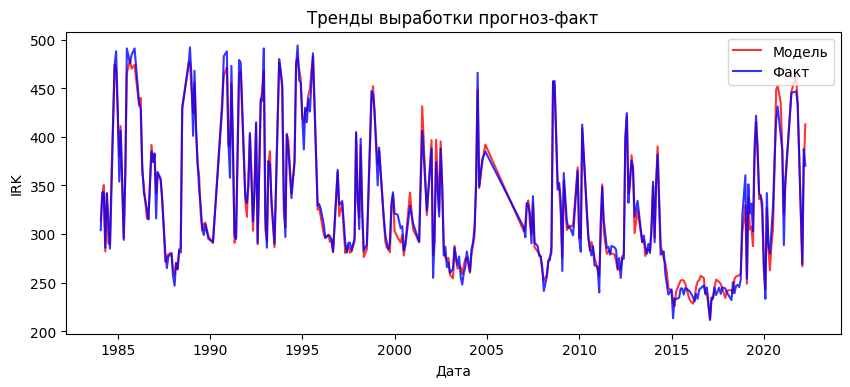

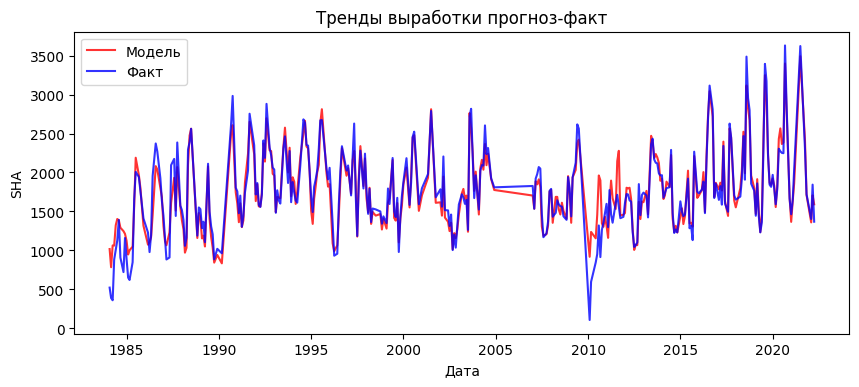

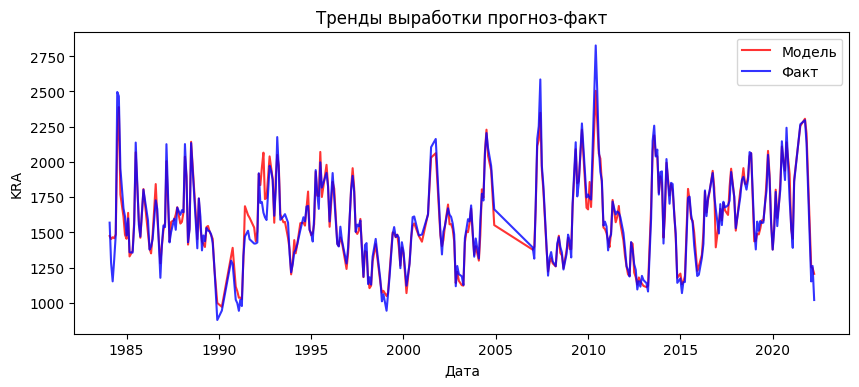

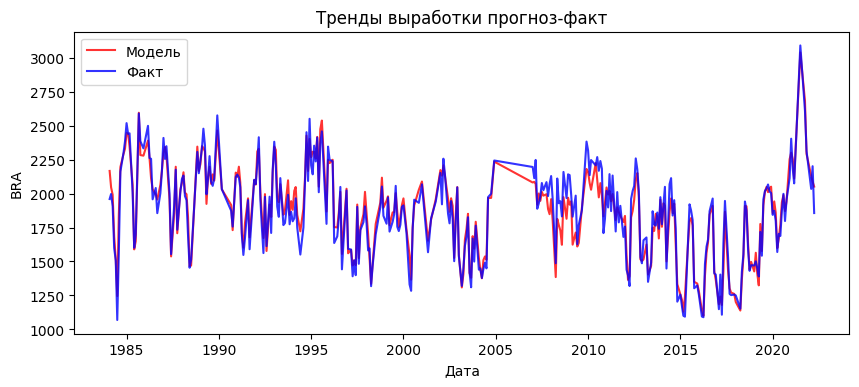

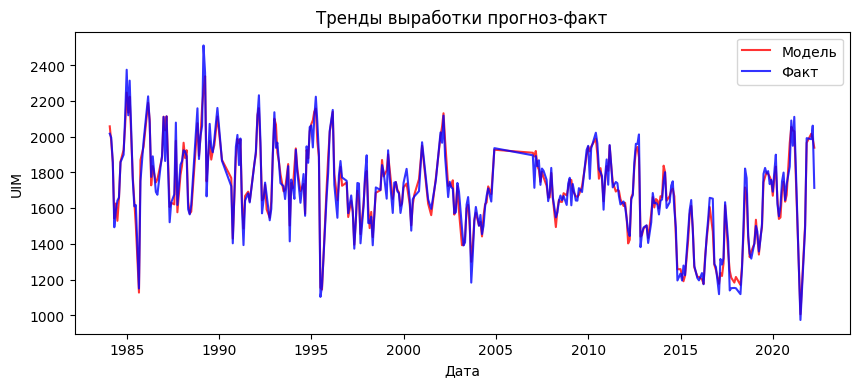

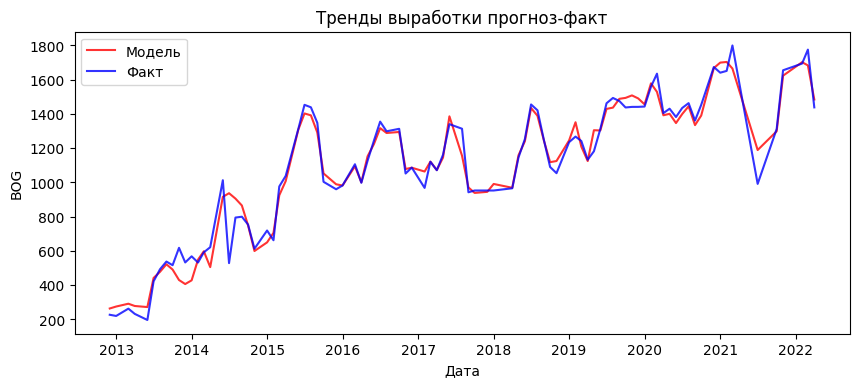

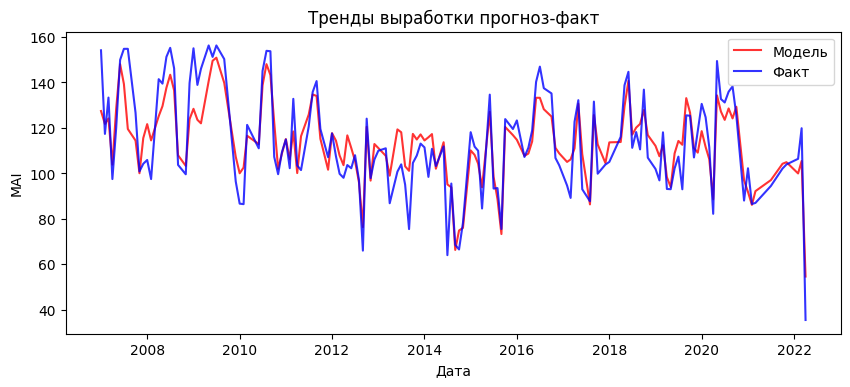

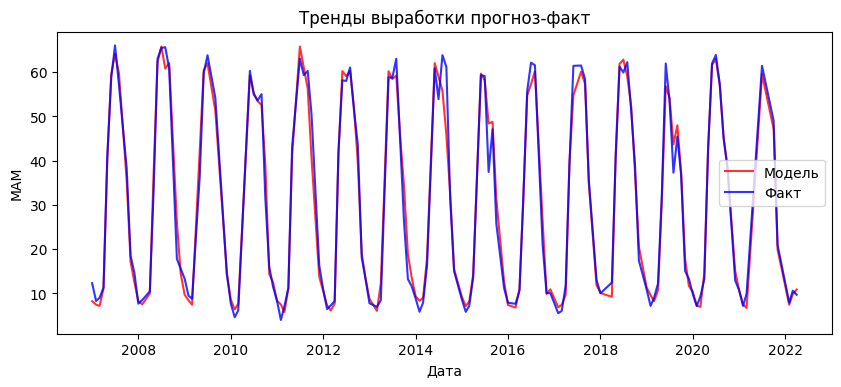

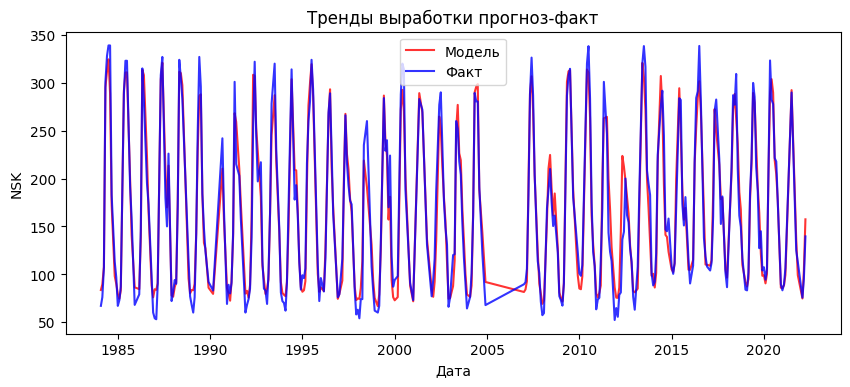

In [28]:
for col in GES_name:
    na_name = df_fact.loc[df_fact[col].isna()].index; #Даты с пропусками
    plt.subplots(figsize=(10,4), dpi=100);
    sns.lineplot(y=model_cat_fact[col].predict(X_train_fact.drop(index=na_name, errors='ignore')), x=X_train_fact.drop(index=na_name, errors='ignore').index,
                 label='Модель', color='Red', alpha=0.8);
    sns.lineplot(y=y_train_fact.drop(index=na_name, errors='ignore')[col], x=X_train_fact.drop(index=na_name, errors='ignore').index,
                 label='Факт', color='Blue', alpha=0.8);
    plt.title('Тренды выработки прогноз-факт');
    plt.savefig(f'../data/Результаты моделирования/Выработка/Графики/{current_date} Модель для {col}.png', dpi=200);
    plt.show()

# Этап 2
Прогноз выработки

In [29]:
#По имеющимся моделям сделаем прогноз
CatBoost_forecast = {}; #Коэффициенты модели выработки

#Узнаем дату с последним сохранением файлов после выполнение блокнота №2
max_date_catboost_forecast = max([i[:10] for i in os.listdir('../data/Параметры модели/coef CatBoost выработка/')]);
max_date_scaler = max([i[:10] for i in os.listdir('../data/Параметры модели/StandardScaler fit/') if 'Генерация' in i]);

#Загрузим коэффициенты CatBoost
for col in GES_name:
    CatBoost_forecast[col] = CatBoostRegressor().load_model(f'../data/Параметры модели/coef CatBoost выработка/{max_date_catboost_forecast} Модель для {col}.cbm');

sc = StandardScaler();
#Загрузим коэффициенты стандартизации данных
scaler_forecast = joblib.load(f'../data/Параметры модели/StandardScaler fit/{max_date_scaler} Генерация Стандартизация данных.joblib');

for col in GES_name:
    dan_forecast = scaler_forecast.transform(df_forecast.drop(columns=GES_name)); #Нормализуем данные
    df_forecast.loc[:, col] = CatBoost_forecast[col].predict(dan_forecast); #Прогноз


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

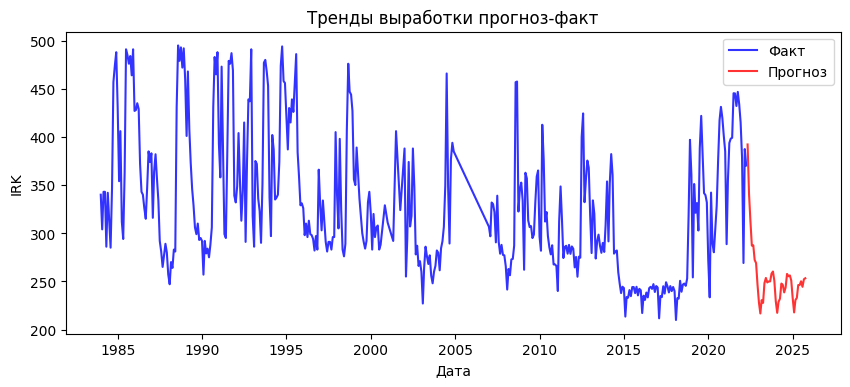

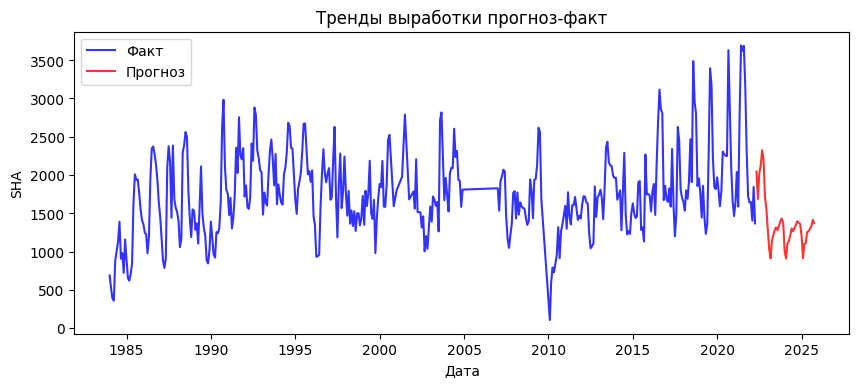

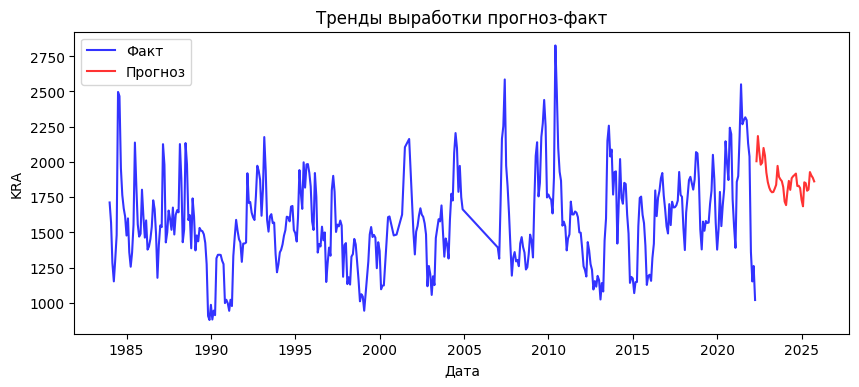

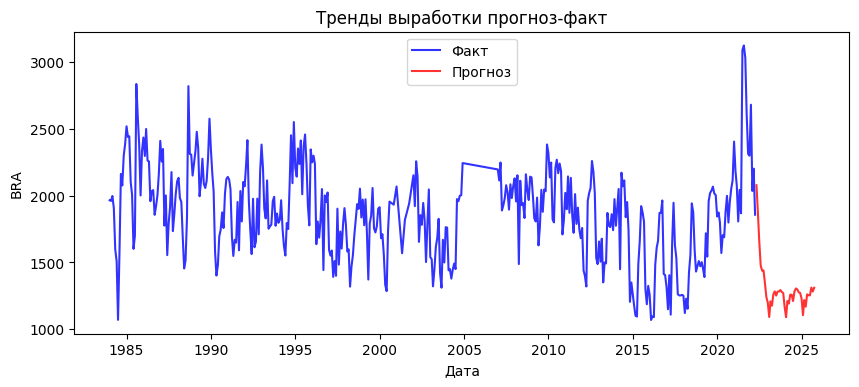

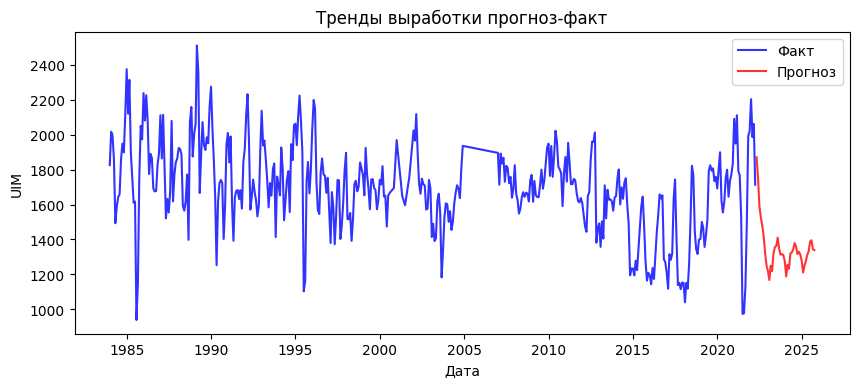

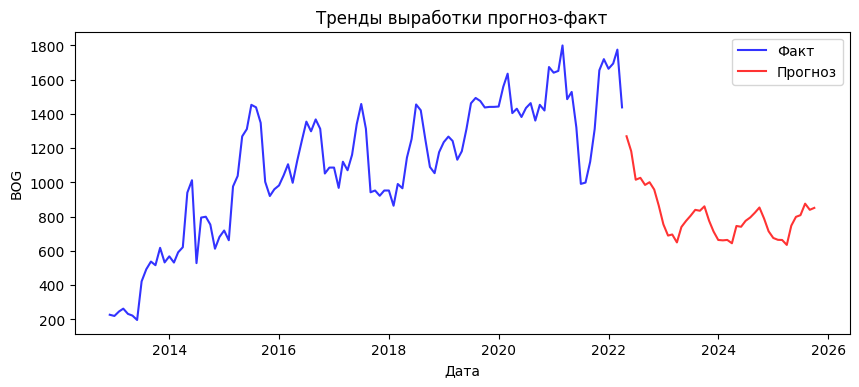

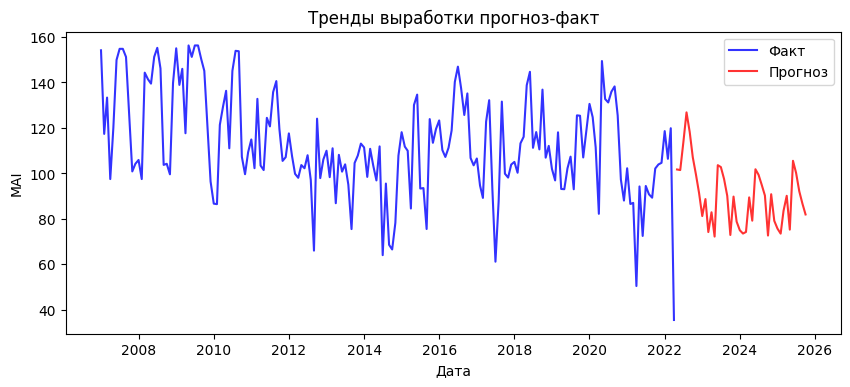

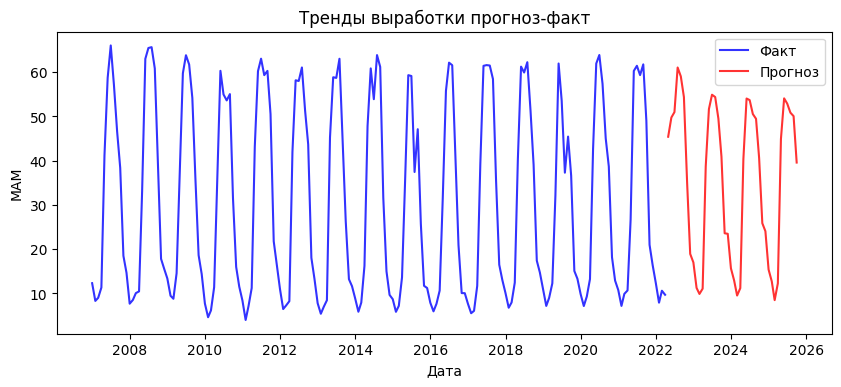

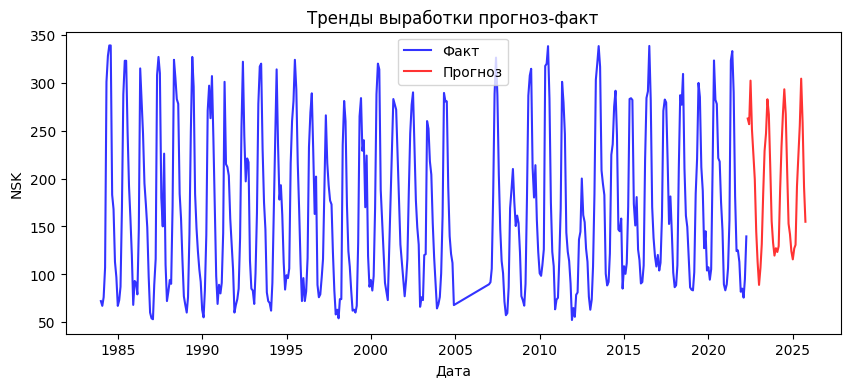

In [30]:
for col in GES_name:
    plt.subplots(figsize=(10,4), dpi=100);
    sns.lineplot(y=df_fact[col], x=df_fact.index, label='Факт', color='Blue', alpha=0.8);
    sns.lineplot(y=df_forecast[col], x=df_forecast.index, label='Прогноз', color='Red', alpha=0.8);
    plt.title('Тренды выработки прогноз-факт');
    plt.savefig(f'../data/Результаты моделирования/Выработка/Графики/{current_date} Результат прогноза {col}.png', dpi=200);
    plt.show()

In [31]:
#Сохраним прогноз
df_save = df_forecast.loc[:, GES_name];
df_save.rename(columns=GES_name, inplace=True);
df_save.to_excel(f'../data/Результаты моделирования/Выработка/{date_data_prog} Результат прогноза.xlsx');
df_save

,Иркутская ГЭС,Саяно-Шушенская ГЭС,Красноярская ГЭС,Братская ГЭС,Усть-Илимская ГЭС,Богучанская ГЭС,Майнская ГЭС,Мамаканская ГЭС,Новосибирская ГЭС
Дата,,,,,,,,,
2022-05-01,392.172059,2045.665756,2004.304306,2077.677458,1870.886341,1269.261515,101.660491,45.374283,262.652734
2022-06-01,340.890466,1687.786041,2183.093336,1872.675219,1754.205470,1181.736781,101.403436,49.716645,256.747075
2022-07-01,312.901687,2020.377490,2068.158341,1653.988465,1588.644376,1015.309902,113.486730,50.938466,302.245182
2022-08-01,287.067004,2126.390474,1979.754355,1474.753142,1526.399775,1026.360569,126.789192,61.019405,251.024335
2022-09-01,287.555931,2323.527575,1993.632385,1437.897267,1477.222017,984.945610,118.170707,59.007604,224.976320
2022-10-01,272.290775,2202.756837,2098.514229,1439.011541,1418.453425,1000.697004,107.009266,54.341109,199.204522
2022-11-01,268.901056,1715.865650,2044.680919,1341.837993,1323.883828,957.937312,99.367953,35.068555,144.702286
2022-12-01,247.025093,1560.078513,1924.110902,1239.426890,1252.571029,864.846475,91.294513,18.903103,112.907677
2023-01-01,228.307873,1285.820753,1857.000276,1197.984804,1219.145906,754.830158,81.162057,16.980958,88.871168


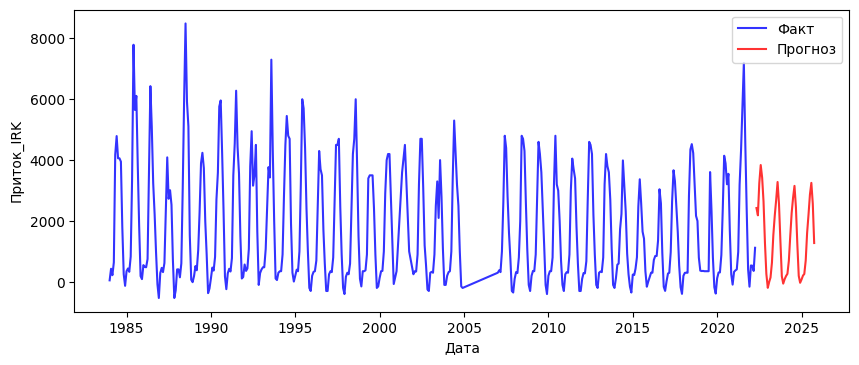

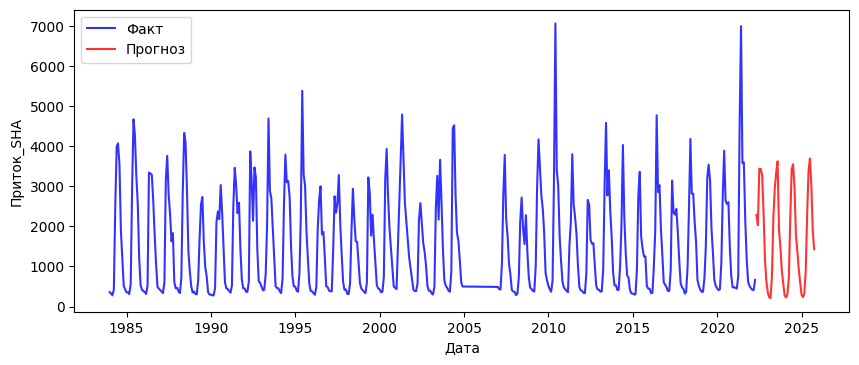

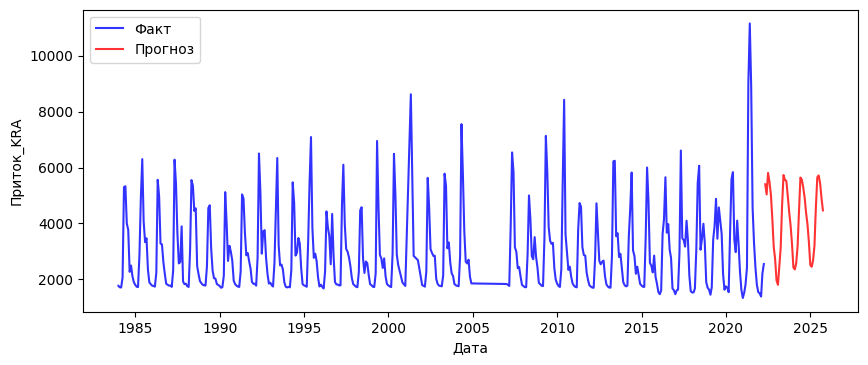

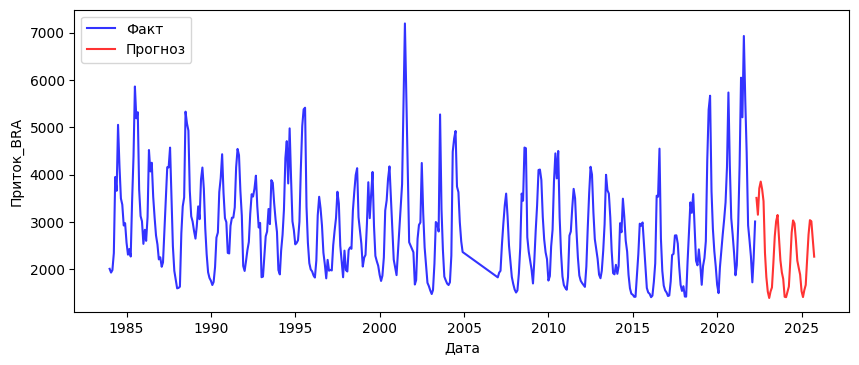

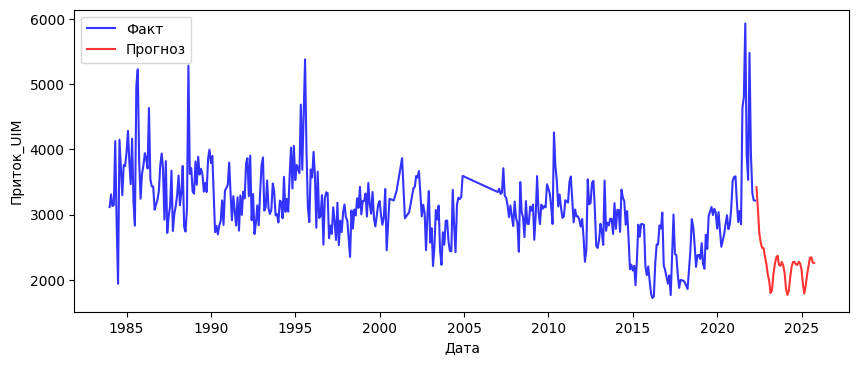

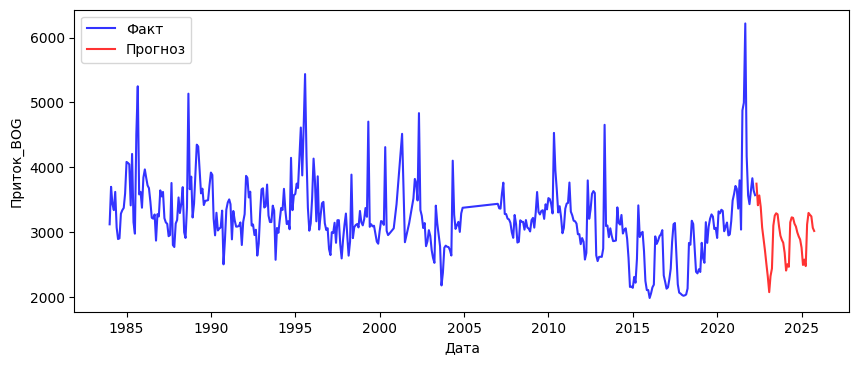

KeyError: 'Приток_MAI'

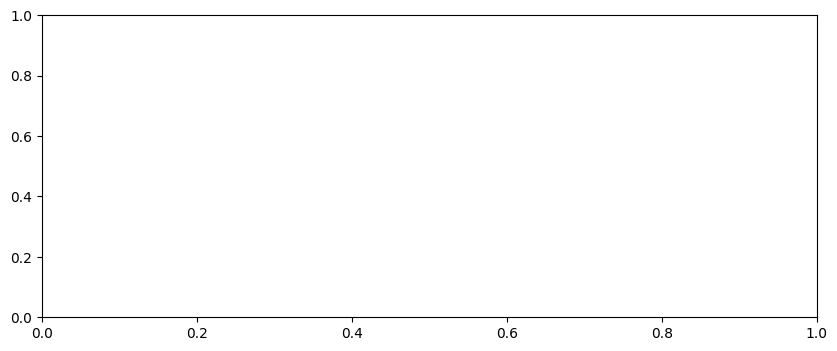

In [32]:
for col in GES_name:
    plt.subplots(figsize=(10,4), dpi=100);
    sns.lineplot(y=df_fact['Приток_'+col], x=df_fact.index, label='Факт', color='Blue', alpha=0.8);
    sns.lineplot(y=df_forecast['Приток_'+col], x=df_forecast.index, label='Прогноз', color='Red', alpha=0.8);
    plt.show()

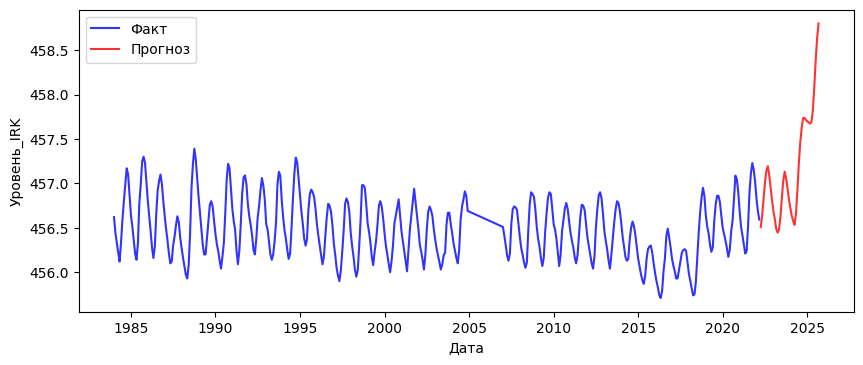

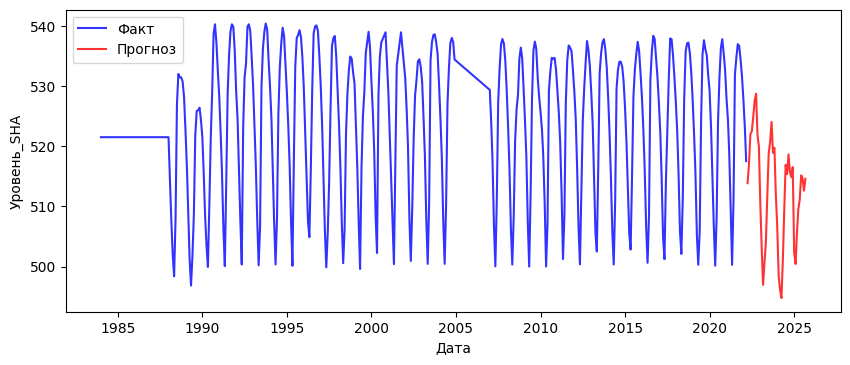

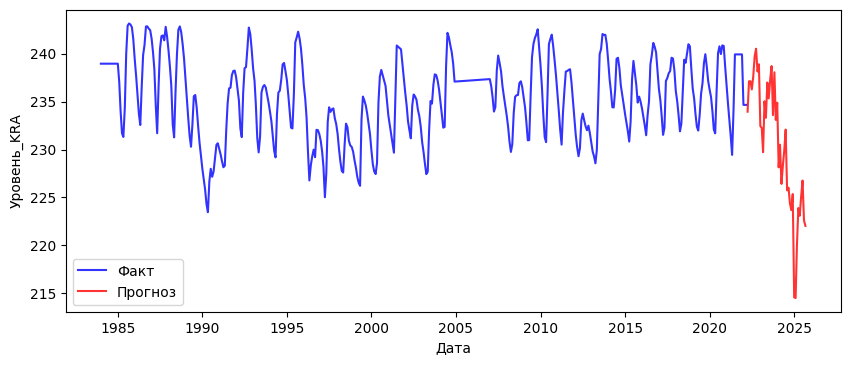

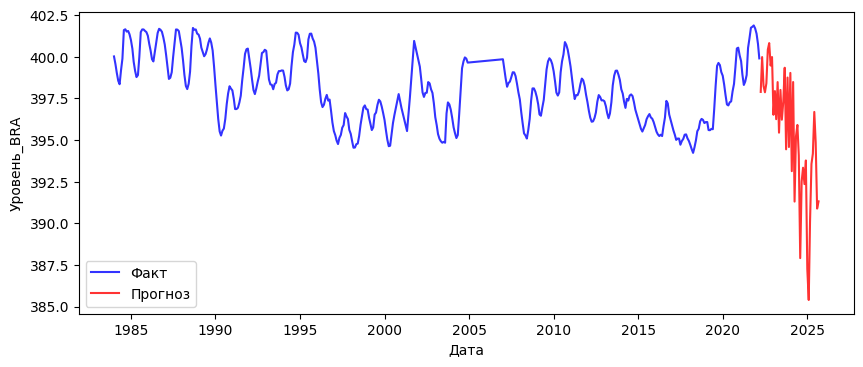

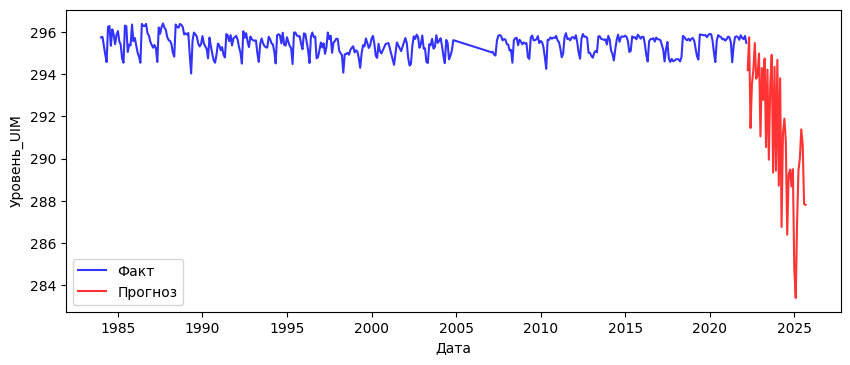

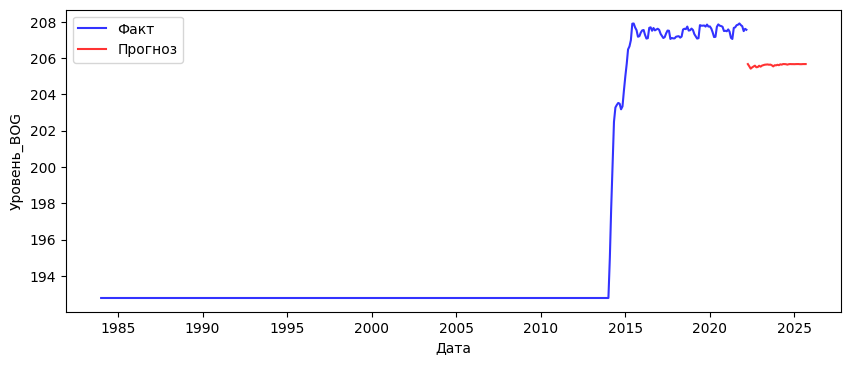

KeyError: 'Уровень_MAI'

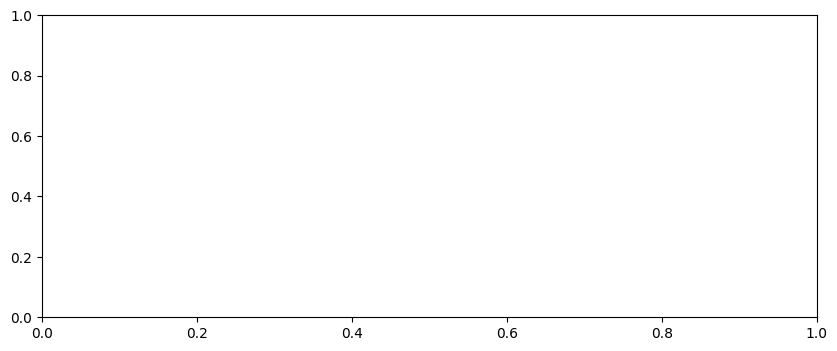

In [113]:
for col in GES_name:
    plt.subplots(figsize=(10,4), dpi=100);
    sns.lineplot(y=df_fact['Уровень_'+col], x=df_fact.index, label='Факт', color='Blue', alpha=0.8);
    sns.lineplot(y=df_forecast['Уровень_'+col], x=df_forecast.index, label='Прогноз', color='Red', alpha=0.8);
    plt.show()